In [1]:
 import sys
 print(sys.executable)
 print(sys.version)
 print(sys.version_info)

/home/meysam/anaconda3/envs/py36/bin/python
3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
# Keras_mnist_MLP
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Dense, Flatten

Using TensorFlow backend.


In [3]:
# Load the dataset
MNIST = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = MNIST.load_data(path='mnist.npz')
# if you dont have the data downloaded
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test  = keras.utils.to_categorical(y_test, num_classes=10)

x_train = x_train.reshape((x_train.shape[0],-1)) # convert the 28X28 image to a vector of 784
x_test  = x_test.reshape((x_test.shape[0],-1))

In [4]:
# CReate the model
inputs = Input(shape=(784,))
lay1   = Dense(64,activation='relu')(inputs)
lay2   = Dense(32,activation='relu')(lay1)
lay3   = Dense(10,activation='softmax')(lay2) 

mnist_MLP_model = Model(inputs=inputs, outputs=lay3)
mnist_MLP_model.summary()

mnist_MLP_model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

history = mnist_MLP_model.fit(x=x_train,y=y_train,batch_size=64, epochs=8,validation_data=(x_test,y_test))

mnist_MLP_model.save('mnist_MLP_model.h5') # save the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 6s 106us/step - loss: 0.3311 - acc: 0.9048 - val_loss: 0.1735 - val_acc: 0.9461
Epoch 2/8
60000/60000 [==============================] - 6s 95us/step - loss: 0.151

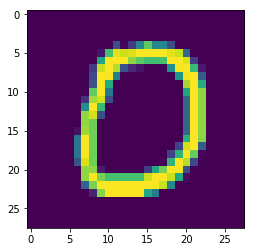

In [5]:
fig = x_test[10,:].reshape((28,28))
plt.imshow(fig)

In [6]:
mnist_MLP_model.predict(x_test[10:11,:])

array([[9.9985266e-01, 4.9184939e-10, 5.1580570e-05, 6.6902111e-08,
        2.2193042e-10, 4.7171889e-07, 1.5236583e-06, 2.6574492e-08,
        6.6344040e-07, 9.3040384e-05]], dtype=float32)

In [7]:
del mnist_MLP_model # delet the model

In [8]:
mnist_MLP_model.predict(x_test[10:11,:])

NameError: name 'mnist_MLP_model' is not defined

In [11]:
from keras.models import load_model
model=load_model('mnist_MLP_model.h5') # do not forget to put .h5 extension and '', otherwise wont work

In [12]:
model.predict(x_test[10:11,:])

array([[9.9985266e-01, 4.9184939e-10, 5.1580570e-05, 6.6902111e-08,
        2.2193042e-10, 4.7171889e-07, 1.5236583e-06, 2.6574492e-08,
        6.6344040e-07, 9.3040384e-05]], dtype=float32)

In [13]:
history = model.fit(x=x_train,y=y_train,batch_size=64, epochs=3,validation_data=(x_test,y_test)) # not that it 
# continue the training from where it left !

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 97us/step - loss: 0.0410 - acc: 0.9875 - val_loss: 0.0835 - val_acc: 0.9757
Epoch 2/3
60000/60000 [==============================] - 6s 96us/step - loss: 0.0350 - acc: 0.9891 - val_loss: 0.1073 - val_acc: 0.9700
Epoch 3/3
60000/60000 [==============================] - 6s 96us/step - loss: 0.0303 - acc: 0.9910 - val_loss: 0.0919 - val_acc: 0.9751
